In [108]:
import pandas as pd
import seaborn as sns

In [72]:
# load the train dataset
train_df = pd.read_csv('train.csv')
train_df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [73]:
# load the test dataset
test_df = pd.read_csv('test.csv')
test_df.shape

(233599, 11)

In [74]:
train_df.shape 

(550068, 12)

In [75]:
# concat both dataset
df = pd.concat([train_df,test_df])

In [76]:
df.shape

(783667, 12)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [78]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [79]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [80]:
# drop the user id
df.drop('User_ID', axis=1,inplace=True)

In [81]:
#convert Gender into numerical variable
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [82]:
# checking unique value
df['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [83]:
# convert into discrete variable
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [84]:
# unique value in City_Category
df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [85]:
# convert into discrete variable
df['City_Category'] = df['City_Category'].map({'A':1,'B':2,'C':3})

In [86]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969.0


In [87]:
# checking the changes
df['City_Category'].unique()

array([1, 3, 2])

In [88]:
# checking the unique value
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [48]:
# convert 4+ into discrete variable
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'4+':4})

In [49]:
df['Stay_In_Current_City_Years'].value_counts()


4.0    120671
Name: Stay_In_Current_City_Years, dtype: int64

In [101]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

/tmp/ipykernel_4151/66897005.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [89]:
# focus on replacing null values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [90]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [91]:
df['Product_Category_2'].mode()

0    8.0
dtype: float64

In [92]:
df['Product_Category_2']= df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [93]:
df['Product_Category_1']= df['Product_Category_1'].fillna(df['Product_Category_1'].mode()[0])
df['Product_Category_3']= df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [96]:
print(df['Product_Category_1'].isnull().sum())
print(df['Product_Category_2'].isnull().sum())
print(df['Product_Category_3'].isnull().sum())

0
0
0


In [102]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 71.7+ MB


In [107]:
# convert object into integer of Stay in Current City Years
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


ValueError: cannot reindex from a duplicate axis

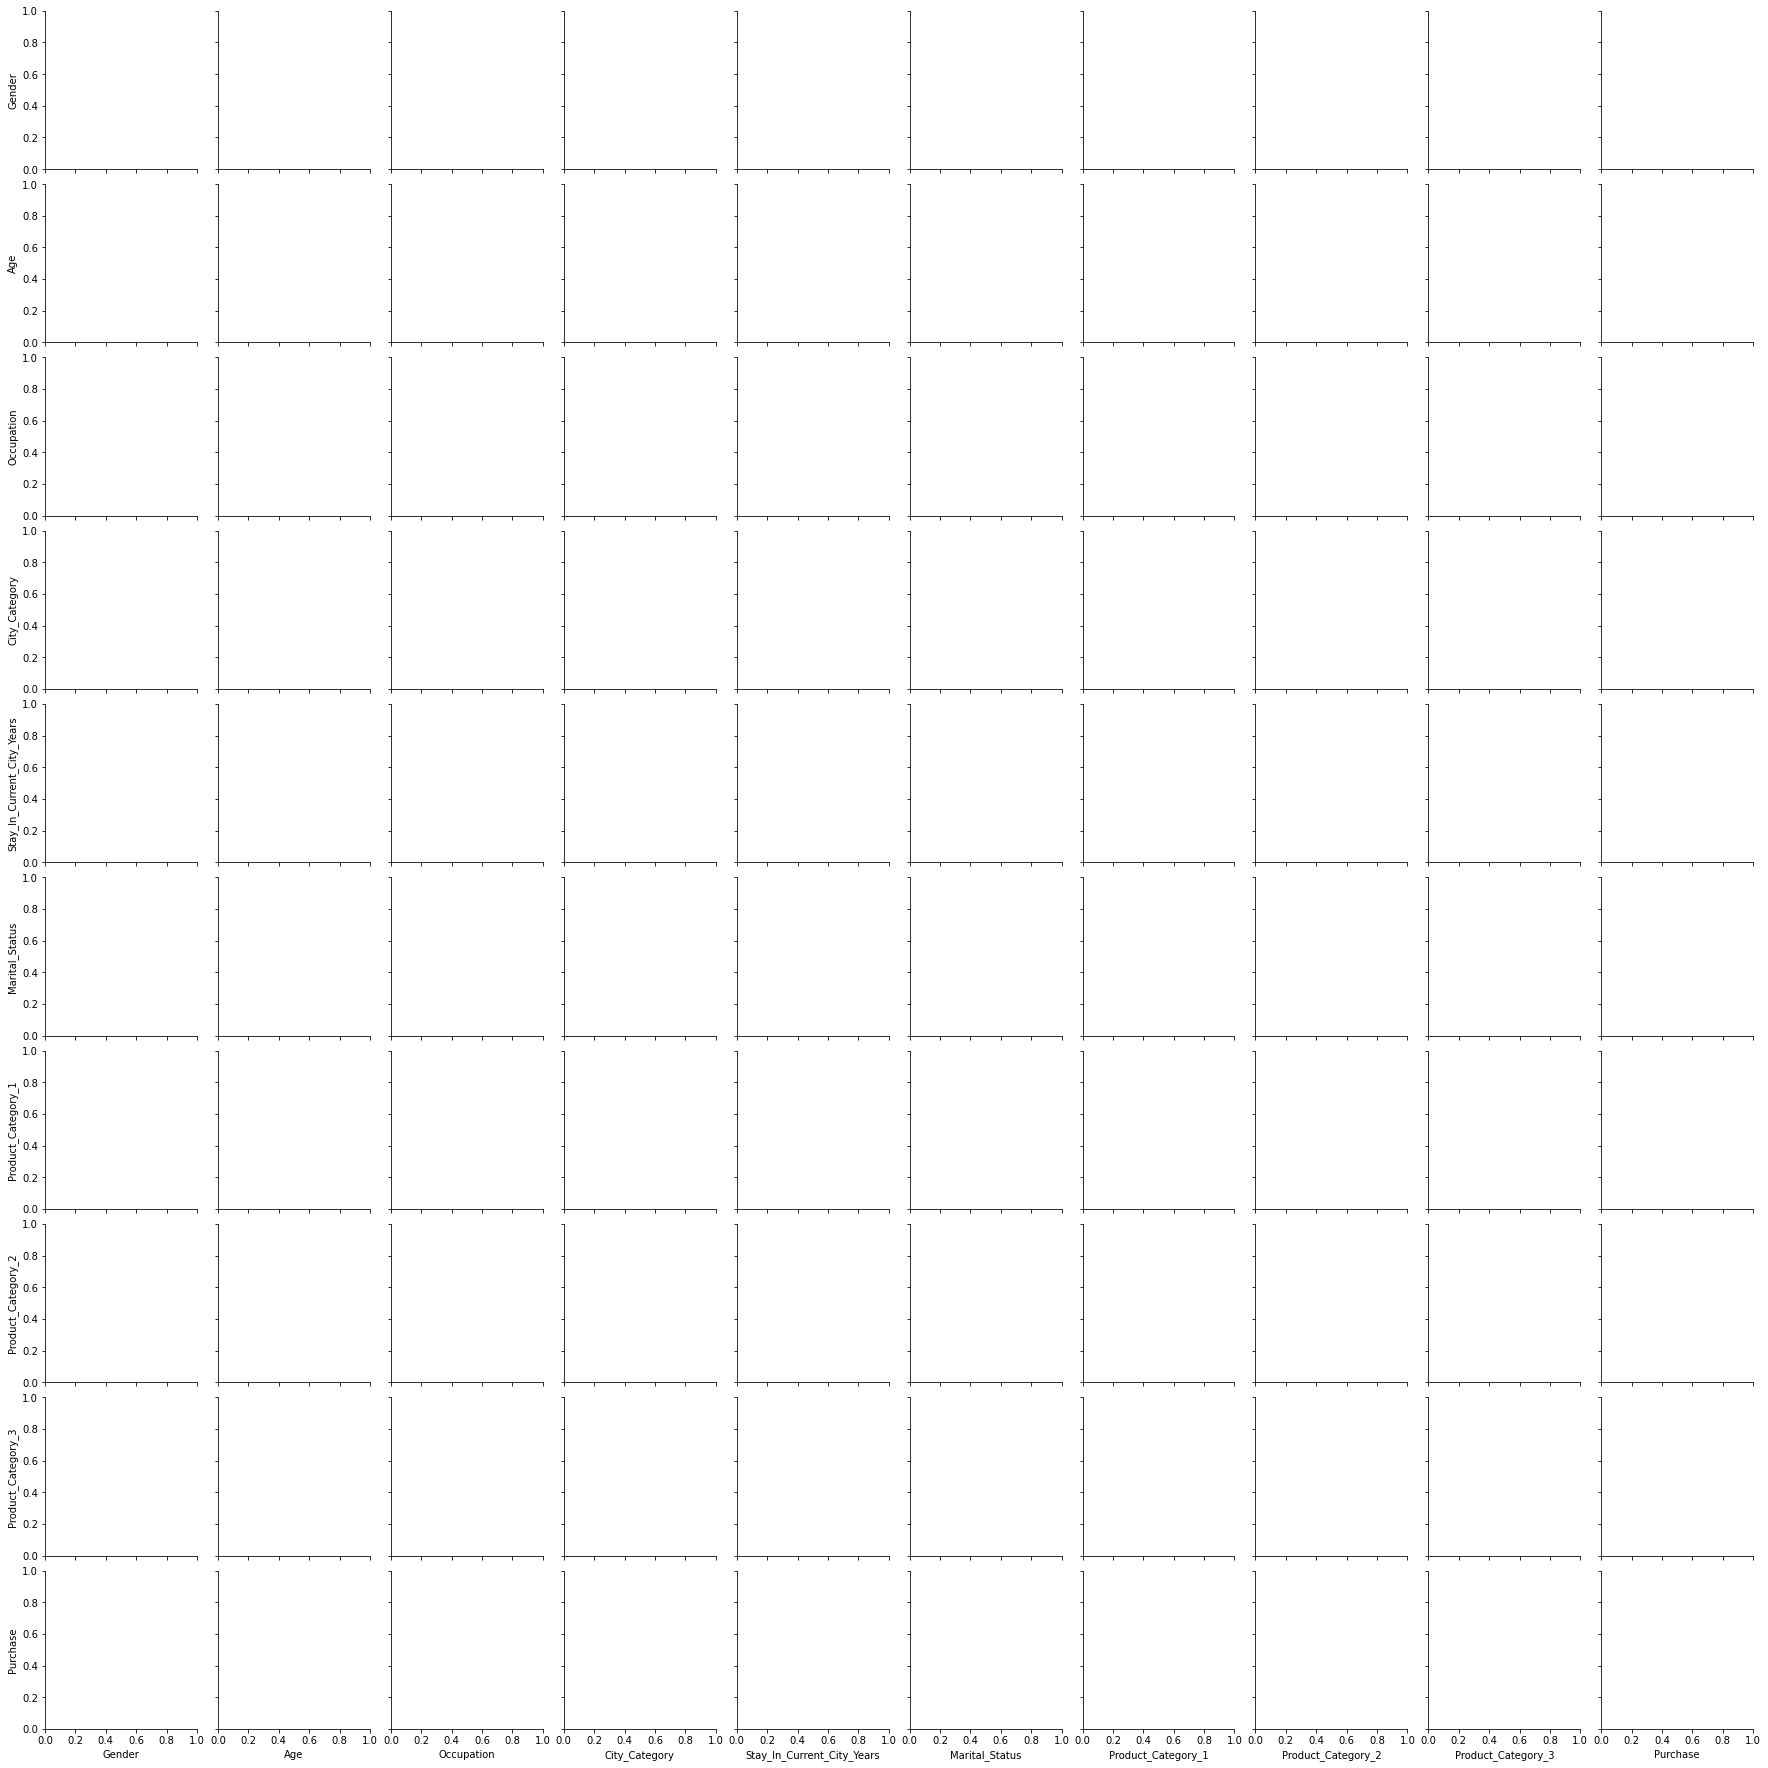

In [109]:
## visualisation 
sns.pairplot(df)


/home/tariq/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

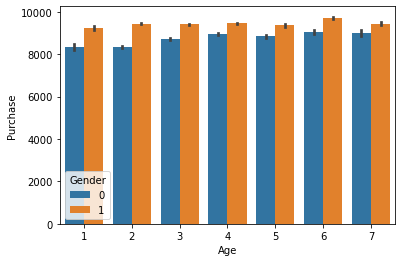

In [114]:
sns.barplot('Age','Purchase',hue = 'Gender',data= df)

### 1. Purchase of good with respect to age is almost equal 
### 2.purchasing of male high then female

/home/tariq/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

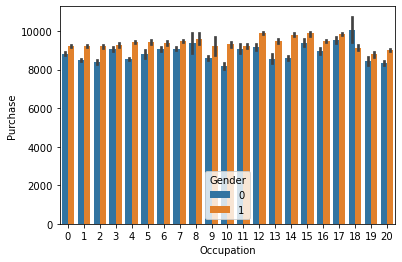

In [115]:
sns.barplot('Occupation','Purchase',hue = 'Gender',data= df)

### It is uniform it will not affect 

/home/tariq/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

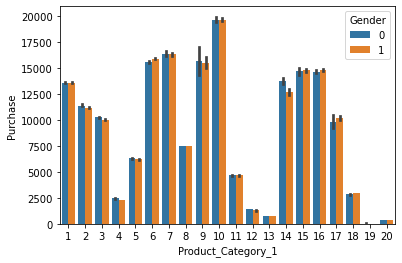

In [116]:
sns.barplot('Product_Category_1','Purchase',hue = 'Gender',data= df)


/home/tariq/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

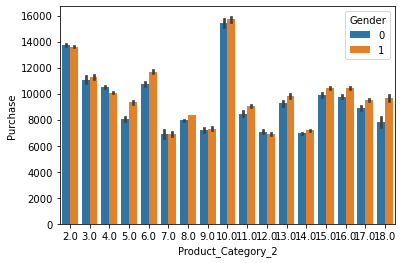

In [119]:
sns.barplot('Product_Category_2','Purchase',hue = 'Gender',data= df)

In [126]:
df.drop("Product_ID",axis=1,inplace=True)

In [127]:
df.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,8.0,16.0,1422.0


In [128]:
test_df = df[df['Purchase'].isnull()]
train_df = df[~df['Purchase'].isnull()]

In [129]:
train_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,8.0,16.0,1422.0
3,0,1,10,1,2,0,12,14.0,16.0,1057.0
4,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [137]:
X_train = train_df.iloc[:,0:-1]
Y_train = train_df['Purchase']

In [138]:
X_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,1,2,0,3,8.0,16.0
1,0,1,10,1,2,0,1,6.0,14.0
2,0,1,10,1,2,0,12,8.0,16.0
3,0,1,10,1,2,0,12,14.0,16.0
4,1,7,16,3,4,0,8,8.0,16.0


In [139]:
test_data = test_df.iloc[:,0:-1]
test_label = test_df.iloc[:,-1]

In [140]:
print('Shape of Train Data is ', X_train.shape)
print('Shape of Train Label is ', Y_train.shape)
print('Shape of Test Data is ', test_data.shape)
print('Shape of Test Label is ', test_label.shape)

Shape of Train Data is  (550068, 9)
Shape of Train Label is  (550068,)
Shape of Test Data is  (233599, 9)
Shape of Test Label is  (233599,)


In [142]:
from sklearn.model_selection import train_test_split
x_train, x_val , y_train,y_val = train_test_split(X_train,Y_train,test_size=0.33)

In [143]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_val  = sc.transform(x_val)

In [ ]:
# the data is ready for training

In [146]:
df1= pd.DataFrame(X_train)

In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368545 entries, 0 to 368544
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       368545 non-null  float64
 1   1       368545 non-null  float64
 2   2       368545 non-null  float64
 3   3       368545 non-null  float64
 4   4       368545 non-null  float64
 5   5       368545 non-null  float64
 6   6       368545 non-null  float64
 7   7       368545 non-null  float64
 8   8       368545 non-null  float64
dtypes: float64(9)
memory usage: 25.3 MB


In [148]:
df1.describe()

,0,1,2,3,4,5,6,7,8
count,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05,3.685450e+05
mean,1.209898e-15,-1.039201e-15,2.307083e-15,2.912680e-16,8.443575e-16,-7.783304e-15,-8.985367e-16,-9.100518e-17,-1.347591e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.748144e+00,-1.845327e+00,-1.238064e+00,-1.370085e+00,-1.442858e+00,-8.326836e-01,-1.117966e+00,-1.689294e+00,-4.369785e+00
25%,5.720353e-01,-3.659819e-01,-9.315527e-01,-1.370085e+00,-6.671010e-01,-8.326836e-01,-1.117966e+00,-2.925215e-01,3.690778e-01
50%,5.720353e-01,-3.659819e-01,-1.652733e-01,-5.420343e-02,1.086558e-01,-8.326836e-01,-1.025062e-01,-2.925215e-01,3.690778e-01
75%,5.720353e-01,3.736908e-01,9.075180e-01,1.261679e+00,8.844126e-01,1.200936e+00,6.590886e-01,1.104251e+00,3.690778e-01
max,5.720353e-01,2.592709e+00,1.827053e+00,1.261679e+00,1.660169e+00,1.200936e+00,3.705468e+00,2.035433e+00,1.098134e+00
